# MNIST digits classification dataset

In this project I've used digit dataset from keras.datasets package and tried applying ANN using Tensorflow.

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Imported digit dataset
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

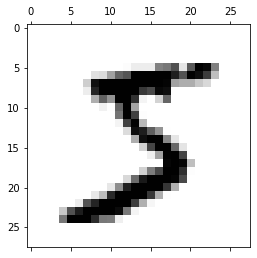

In [8]:
plt.matshow(x_train[0], cmap= 'gray_r')

In [9]:
y_train[0]

5

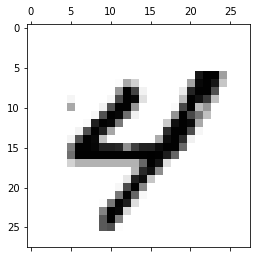

In [10]:
plt.matshow(x_train[89], cmap= 'gray_r')

In [11]:
y_train[89]

4

In [12]:
# # Normalized the data between 0 to 1 by dividing with 255 ( color scale)
x_train= x_train/255
x_test= x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Build a neural network with single hidden layer.

In [14]:
from keras.layers import Flatten, Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [15]:
model_sh= Sequential(
[
    Flatten(input_shape=[28,28]), # Input layer converted from 2d into 1d.
    Dense(50, activation='sigmoid'), # 50 neurons in 1st hidden layer.
    Dense(10, activation='softmax') # 10 distinct prob values as 10 diff outputs are there.
    
]
)

In [16]:
model_sh.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sh.compile(loss= 'sparse_categorical_crossentropy',
                optimizer= 'adam',
                metrics= ['accuracy'])

In [18]:
model_sh.fit(x_train, y_train, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 22s 362us/step - loss: 0.4936 - accuracy: 0.8823
Epoch 2/5
60000/60000 [==============================] - 26s 437us/step - loss: 0.2315 - accuracy: 0.9345s - loss: 0.2326 - ac - ETA: 2s - l - ETA: 1s - loss: 0.2309 - accu
Epoch 3/5
60000/60000 [==============================] - 42s 698us/step - loss: 0.1807 - accuracy: 0.9488
Epoch 4/5
60000/60000 [==============================] - 38s 626us/step - loss: 0.1510 - accuracy: 0.9566
Epoch 5/5
60000/60000 [==============================] - 36s 597us/step - loss: 0.1292 - accuracy: 0.9633


In [19]:
yp_sh= model_sh.predict(x_test)
yp_sh[:5]

array([[1.3465314e-04, 8.8504967e-05, 3.4779040e-04, 2.5769167e-03,
        5.9621134e-06, 1.1080449e-04, 1.2293940e-07, 9.9445641e-01,
        7.7317338e-05, 2.2015960e-03],
       [2.0442633e-03, 1.6866750e-03, 9.8847479e-01, 4.4086473e-03,
        1.1453522e-08, 1.9031783e-03, 1.3594730e-03, 6.5928070e-06,
        1.1614069e-04, 2.8291279e-07],
       [2.7907627e-06, 9.9603432e-01, 1.9059776e-03, 2.8296467e-04,
        4.2063435e-05, 2.1326402e-04, 1.5044329e-04, 9.4327948e-04,
        3.9857253e-04, 2.6405018e-05],
       [9.9648130e-01, 2.2222757e-05, 8.7723130e-04, 1.2423284e-04,
        7.9518377e-06, 1.2813388e-04, 8.9217111e-04, 7.4146502e-04,
        4.2754960e-05, 6.8228791e-04],
       [2.1019616e-04, 5.9293607e-06, 2.8363494e-03, 2.4081452e-05,
        9.7722524e-01, 6.2849496e-05, 3.1621510e-04, 8.3546649e-04,
        3.6769078e-04, 1.8115982e-02]], dtype=float32)

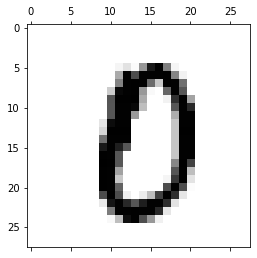

In [20]:
plt.matshow(x_test[55], cmap='gray_r')

In [21]:
yp_sh[55]

array([9.9582601e-01, 4.6860719e-06, 1.7905679e-04, 1.6012018e-04,
       3.9209085e-06, 2.3525911e-03, 4.1488829e-04, 7.7439261e-05,
       8.6329208e-04, 1.1806106e-04], dtype=float32)

In [22]:
np.argmax(yp_sh[55])

0

In [23]:
# To measure overall accuracy.
loss, accuracy= model_sh.evaluate(x_test, y_test)
print('This model results in {0} of loss and {1} of accuracy'.format(round(loss,3), round(accuracy,3)))

10000/10000 [==============================] - 1s 143us/step
This model results in 0.135 of loss and 0.959 of accuracy


In [24]:
yp_labels= [np.argmax(i) for i in yp_sh]
yp_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm= tf.math.confusion_matrix(y_test, yp_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    1,    0,    2,    3,    2,    1,    0],
       [   0, 1122,    3,    1,    0,    1,    4,    1,    3,    0],
       [   9,    2,  992,    4,    2,    0,    5,    8,    8,    2],
       [   0,    0,   12,  969,    0,    7,    0,   11,    8,    3],
       [   1,    0,   10,    1,  927,    0,    4,    4,    4,   31],
       [   6,    3,    1,   26,    2,  828,    9,    3,    7,    7],
       [  11,    3,    7,    0,    4,   10,  918,    2,    3,    0],
       [   2,    6,   17,    5,    1,    0,    0,  985,    0,   12],
       [   5,    3,    7,   17,    4,    3,    3,   11,  919,    2],
       [   6,    7,    0,   13,   11,    2,    0,    9,    2,  959]])>

Text(0.5, 1.0, 'Truth vs Predicted values')

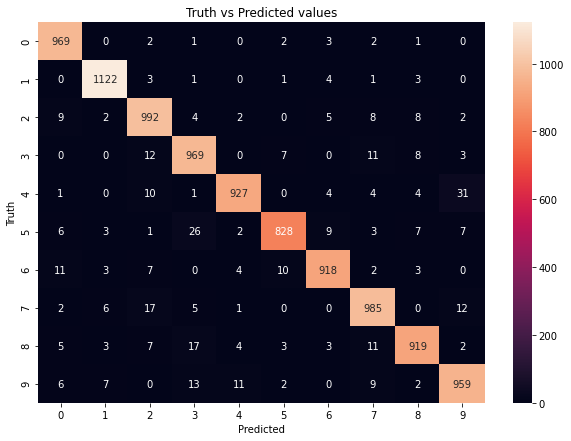

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Truth vs Predicted values')

##  Build a neural network with two hidden layers.

In [27]:
model_th= Sequential(
[
    Flatten(input_shape=[28,28]), # Input layer converted from 2d into 1d.
    Dense(100, activation='relu'), # 100 neurons in 1st hidden layer.
    Dense(50, activation='sigmoid'), # 50 neurons in 2nd hidden layer.
    Dense(10, activation='softmax') # 10 distinct prob values as 10 diff outputs are there.
    
]
)

In [28]:
model_th.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_th.compile(loss= 'sparse_categorical_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [30]:
model_th.fit(x_train, y_train, epochs= 6)

Epoch 1/6
60000/60000 [==============================] - 33s 555us/step - loss: 0.3495 - accuracy: 0.9108
Epoch 2/6
60000/60000 [==============================] - 54s 905us/step - loss: 0.1257 - accuracy: 0.9621s - ETA: 0s - loss: 0.126
Epoch 3/6
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 4/6
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0629 - accuracy: 0.9808
Epoch 5/6
60000/60000 [==============================] - 55s 916us/step - loss: 0.0501 - accuracy: 0.9846
Epoch 6/6
60000/60000 [==============================] - 52s 862us/step - loss: 0.0404 - accuracy: 0.9879


In [31]:
yp_th= model_th.predict(x_test)
yp_th[:5]

array([[9.93900539e-06, 2.00291688e-05, 2.21013543e-04, 2.82018504e-04,
        1.04694732e-06, 2.08760495e-04, 1.21071409e-07, 9.98941362e-01,
        7.51687867e-06, 3.08239774e-04],
       [4.48126866e-06, 1.78805218e-04, 9.99617457e-01, 3.97281074e-05,
        2.40947514e-07, 1.30978469e-06, 5.22478831e-06, 1.05233823e-06,
        1.51728455e-04, 2.15809237e-08],
       [1.15707735e-06, 9.99368489e-01, 1.68040177e-04, 5.75011745e-06,
        5.44491450e-05, 3.40449478e-05, 3.08415838e-05, 1.71614840e-04,
        1.57685819e-04, 7.72580916e-06],
       [9.98578668e-01, 4.91805940e-06, 2.15234526e-04, 1.33650765e-05,
        2.20265647e-05, 2.31127764e-04, 3.99071607e-04, 5.34955470e-05,
        2.03703576e-06, 4.80220187e-04],
       [5.04274453e-07, 2.27574110e-05, 1.50336555e-05, 8.82502377e-07,
        9.99303818e-01, 1.53761139e-05, 8.85806060e-07, 1.16710726e-04,
        9.11087136e-06, 5.14977379e-04]], dtype=float32)

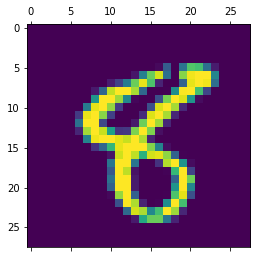

In [32]:
plt.matshow(x_test[84])

In [33]:
yp_th[84]

array([1.19664655e-05, 9.90466651e-06, 4.61667260e-05, 1.27689666e-04,
       6.10731367e-05, 8.91923410e-05, 8.49921053e-05, 4.74835178e-06,
       9.99399662e-01, 1.64669589e-04], dtype=float32)

In [34]:
np.argmax(yp_th[84])

8

In [35]:
yp_labels_th= [ np.argmax(i) for i in yp_th]
yp_labels_th[:5]

[7, 2, 1, 0, 4]

In [36]:
loss, accuracy= model_th.evaluate(x_test, y_test)
print('This model results in {0} of loss and {1} of accuracy'.format(round(loss,3), round(accuracy,3)))

10000/10000 [==============================] - 2s 185us/step
This model results in 0.077 of loss and 0.977 of accuracy


In [37]:
cm_th= tf.math.confusion_matrix(y_test, yp_labels_th)
cm_th

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    2,    0,    1,    2,    1,    3,    0],
       [   0, 1121,    3,    1,    0,    1,    3,    1,    4,    1],
       [   4,    2, 1010,    4,    3,    0,    2,    3,    4,    0],
       [   0,    0,    6,  968,    0,   21,    0,    5,    7,    3],
       [   0,    0,    2,    0,  959,    0,    7,    3,    0,   11],
       [   3,    0,    0,    7,    0,  871,    5,    0,    4,    2],
       [   4,    2,    1,    0,    4,    4,  943,    0,    0,    0],
       [   1,    5,   11,    2,    2,    0,    0,  999,    2,    6],
       [   4,    0,    4,    5,    6,    2,    5,    2,  940,    6],
       [   1,    2,    0,    3,    7,    4,    2,    3,    2,  985]])>

Text(0.5, 1.0, 'Truth vs Predicted values')

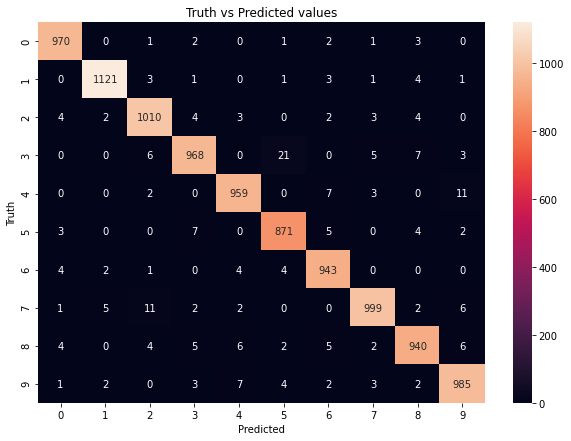

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_th, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Truth vs Predicted values')

It seems like using 2 hidden layers improved our simple accuracy to 98%. So by having more layers and more neurons tend to improve the network's performance.